In [5]:
%matplotlib notebook

from collections import (
    namedtuple,
    OrderedDict,
)

import matplotlib.pyplot as plt
import numpy as np
import torch

from src.padding import pad_side, get_corners, get_neighbors

torch.set_printoptions(precision=2, sci_mode=False)


def plot(ax, t, m):
    t = t.cpu().numpy()
    xs = t[:, :, 0].flatten()
    ys = t[:, :, 1].flatten()
    zs = t[:, :, 2].flatten()
    print([x.shape for x in [xs, ys, zs]])
    ax.scatter(xs, ys, zs, marker=m)   

def shape(*args):
    return print([f.shape for f in args])

device = torch.device('cuda')

n, start, end = 7, -0.5, 0.5

d1, d2 = torch.meshgrid(
    torch.linspace(start, end, steps=n),
    torch.linspace(start, end, steps=n))
d1, d2 = d1.to(device), d2.to(device)

d3 = torch.full_like(d1, end) + 1 / n
sides =  OrderedDict({
    'front': torch.stack((+d3,  d1,  d2), dim=-1),
    'right': torch.stack(( d1, +d3,  d2), dim=-1),    
    'back' : torch.stack((-d3,  d1,  d2), dim=-1),         
    'left' : torch.stack(( d1, -d3,  d2), dim=-1),
    'top'  : torch.stack(( d1,  d2, +d3), dim=-1),
    'down' : torch.stack(( d1,  d2, -d3), dim=-1),
})
sides.keys()

shape(d1, d2, d3)

[torch.Size([7, 7]), torch.Size([7, 7]), torch.Size([7, 7])]


torch.Size([13, 13, 3])


<IPython.core.display.Javascript object>


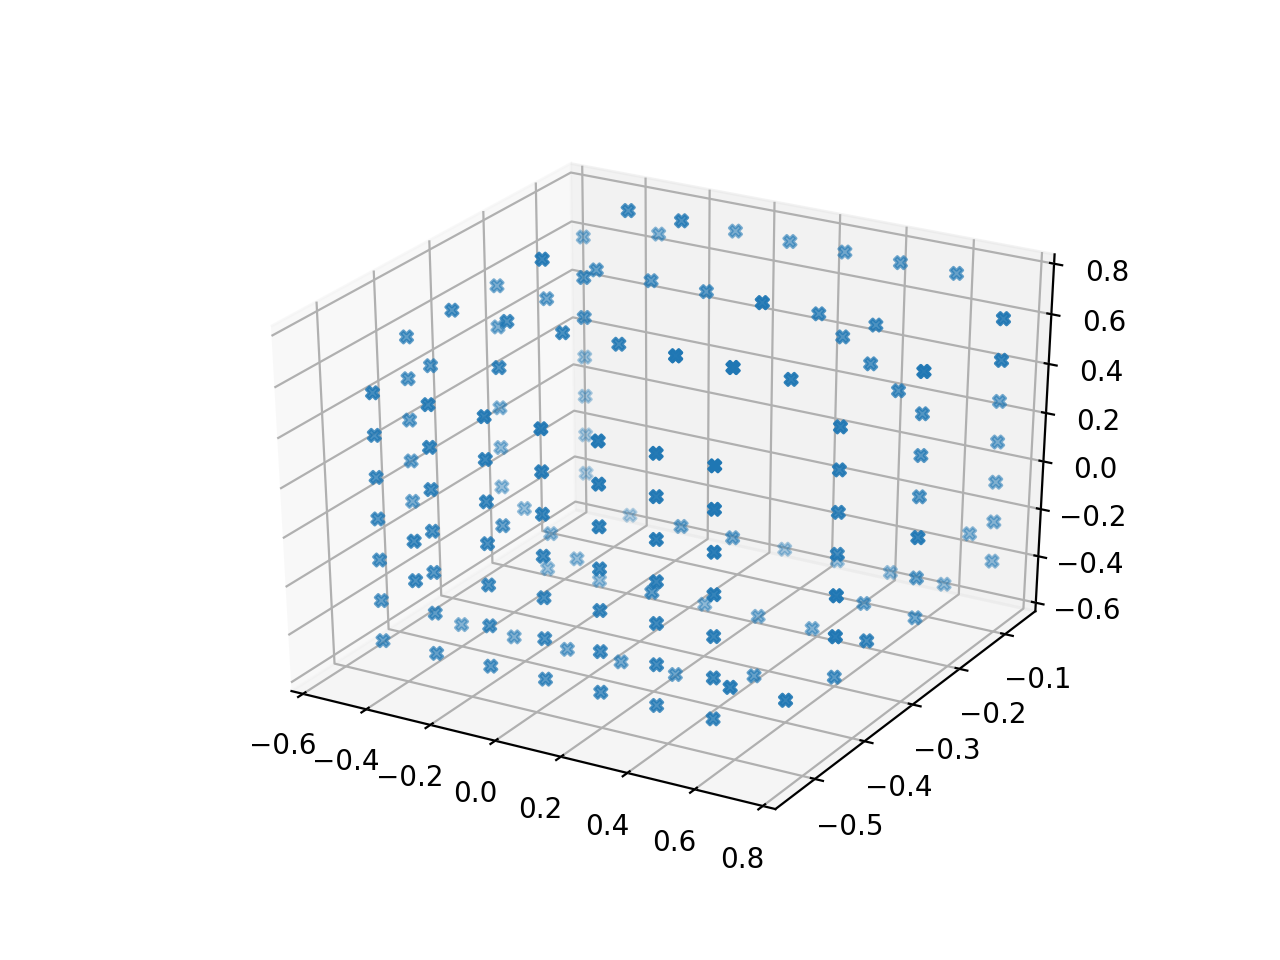

[(169,), (169,), (169,)]


In [2]:
side_name = 'left'
kernel_size = 7

padded = pad_side(sides, side_name, kernel_size)
print(padded.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#plot(ax, o, '8')
plot(ax, padded + 0.1, 'X')

[torch.Size([3, 3, 3]), torch.Size([7, 3, 3]), torch.Size([3, 3, 3])]
[torch.Size([3, 7, 3]), torch.Size([7, 7, 3]), torch.Size([3, 7, 3])]
[torch.Size([3, 3, 3]), torch.Size([7, 3, 3]), torch.Size([3, 3, 3])]
torch.Size([13, 13, 3])


<IPython.core.display.Javascript object>


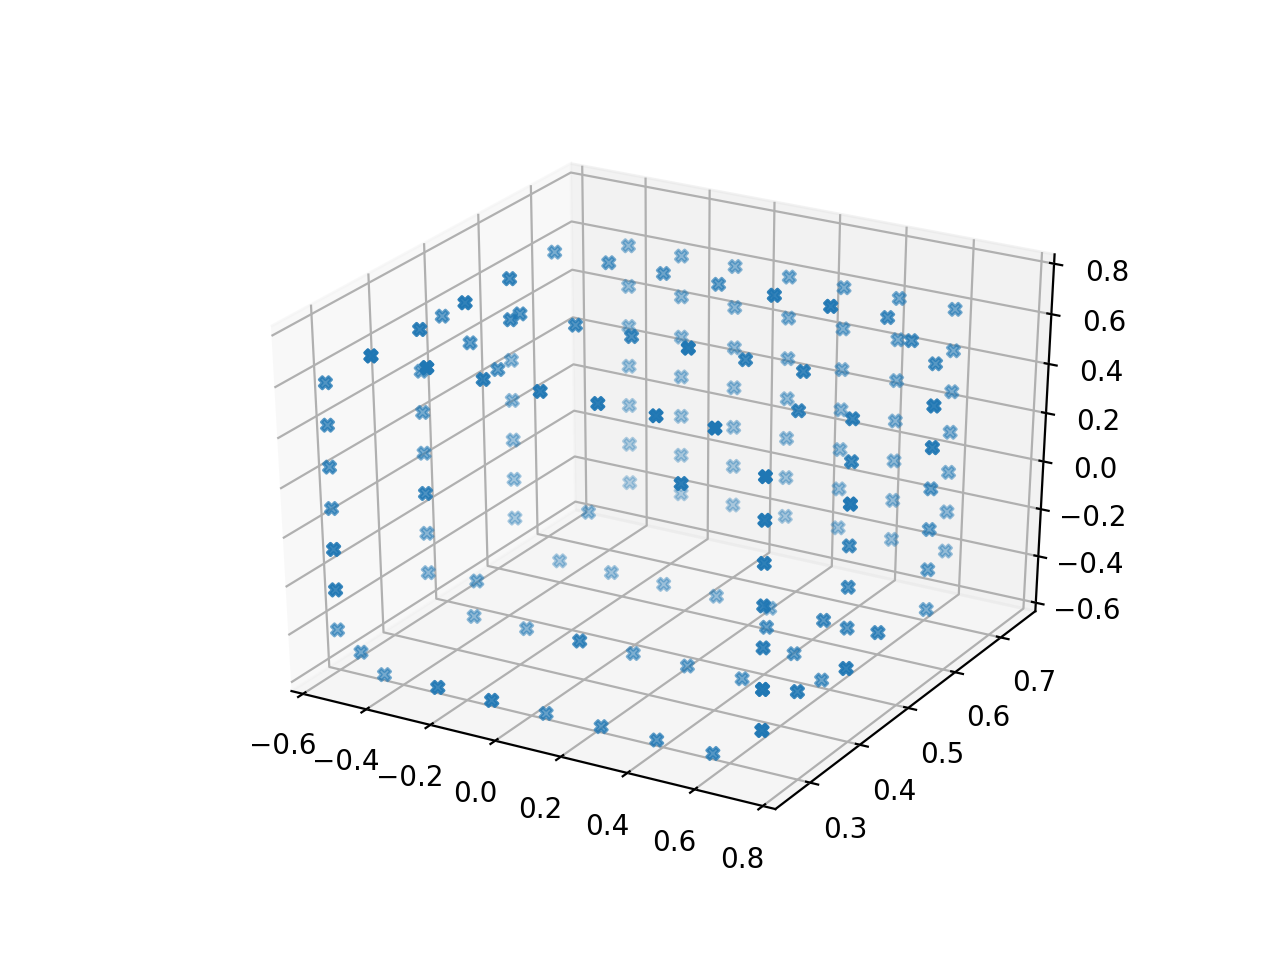

[(169,), (169,), (169,)]


In [10]:
side_name = 'right'
kernel_size = 7

def pad_side(sides, side_name, kernel_size):
    o = sides[side_name]
    size = (kernel_size - 1) // 2
    l, r, t, d = get_neighbors(sides, side_name, size)
    lt, tr, ld, dr = get_corners(size, side_name, l, r, t, d)
    
    shape(lt, t, tr)    
    shape(l, o, r)
    shape(ld, d, dr)
    
    top = torch.cat((lt, t, tr), dim=0)
    down = torch.cat((ld, d, dr), dim=0)
    middle = torch.cat((l, o, r), dim=0)

    return torch.cat((top, middle, down), dim=1)

padded = pad_side(sides, side_name, kernel_size)
print(padded.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#plot(ax, o, '8')
plot(ax, padded + 0.1, 'X')

[torch.Size([3, 3, 3]), torch.Size([3, 7, 3]), torch.Size([3, 3, 3])]
[torch.Size([3, 3, 3]), torch.Size([3, 7, 3]), torch.Size([3, 3, 3])]
[torch.Size([3, 7, 3]), torch.Size([7, 7, 3]), torch.Size([3, 7, 3])]
torch.Size([13, 13, 3])


<IPython.core.display.Javascript object>


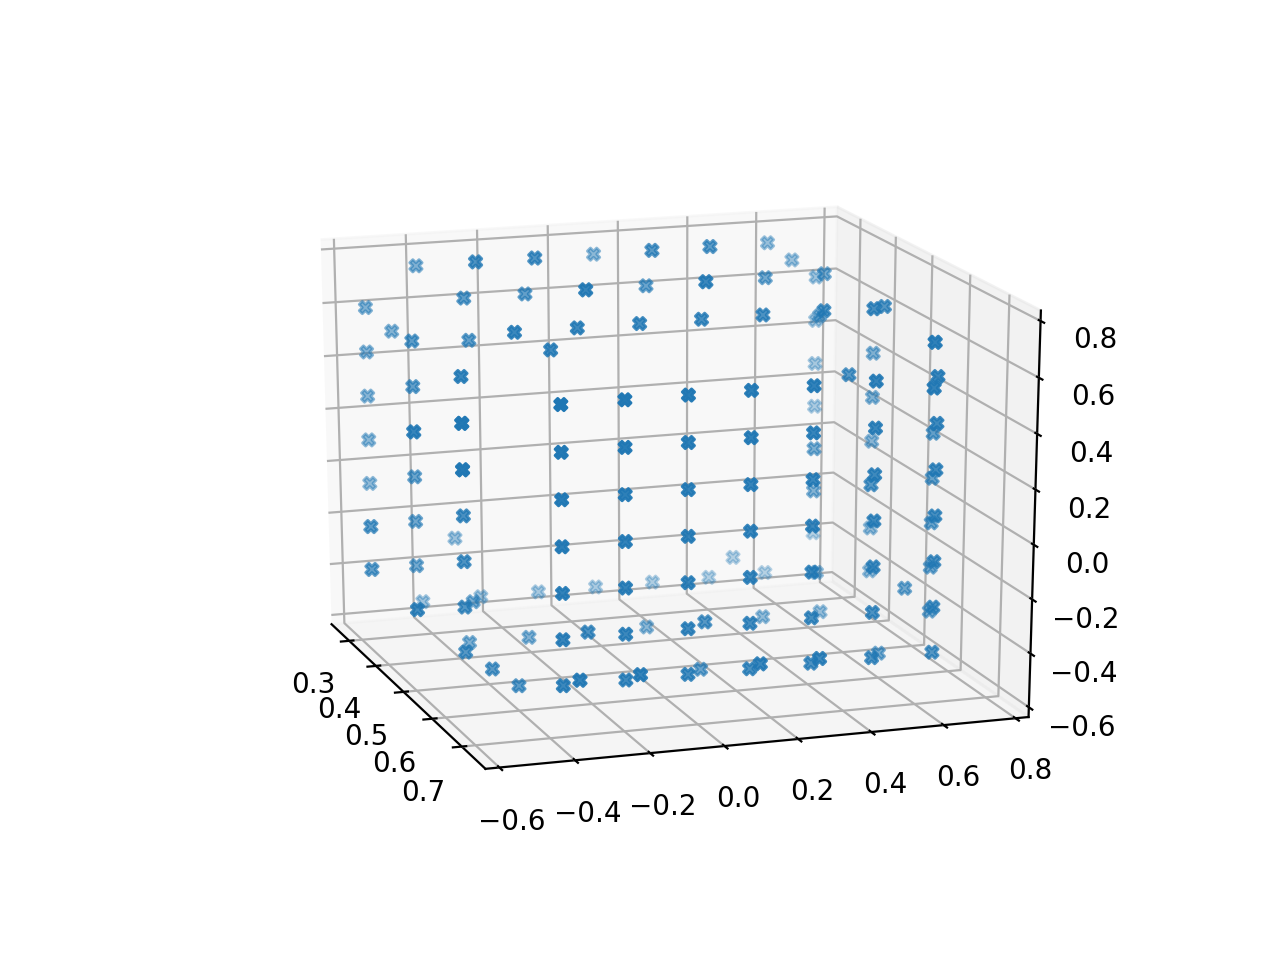

[(169,), (169,), (169,)]


In [13]:
side_name = 'front'
kernel_size = 7

def pad_side(sides, side_name, kernel_size):
    o = sides[side_name]
    size = (kernel_size - 1) // 2
    l, r, t, d = get_neighbors(sides, side_name, size)
    lt, tr, ld, dr = get_corners(size, side_name, l, r, t, d)
    
    shape(lt, t, tr)
    shape(ld, d, dr)
    shape(l, o, r)
    
    top = torch.cat((lt, t.permute(1, 0, 2), tr), dim=0)
    down = torch.cat((ld, d.permute(1, 0, 2), dr), dim=0)
    middle = torch.cat((l, o, r), dim=0)

    return torch.cat((top, middle, down), dim=1)


padded = pad_side(sides, side_name, kernel_size)
print(padded.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#plot(ax, o, '8')
plot(ax, padded + 0.1, 'X')

[torch.Size([3, 3, 3]), torch.Size([3, 7, 3]), torch.Size([3, 3, 3])]
[torch.Size([3, 3, 3]), torch.Size([3, 7, 3]), torch.Size([3, 3, 3])]
[torch.Size([3, 7, 3]), torch.Size([7, 7, 3]), torch.Size([3, 7, 3])]
torch.Size([13, 13, 3])


<IPython.core.display.Javascript object>


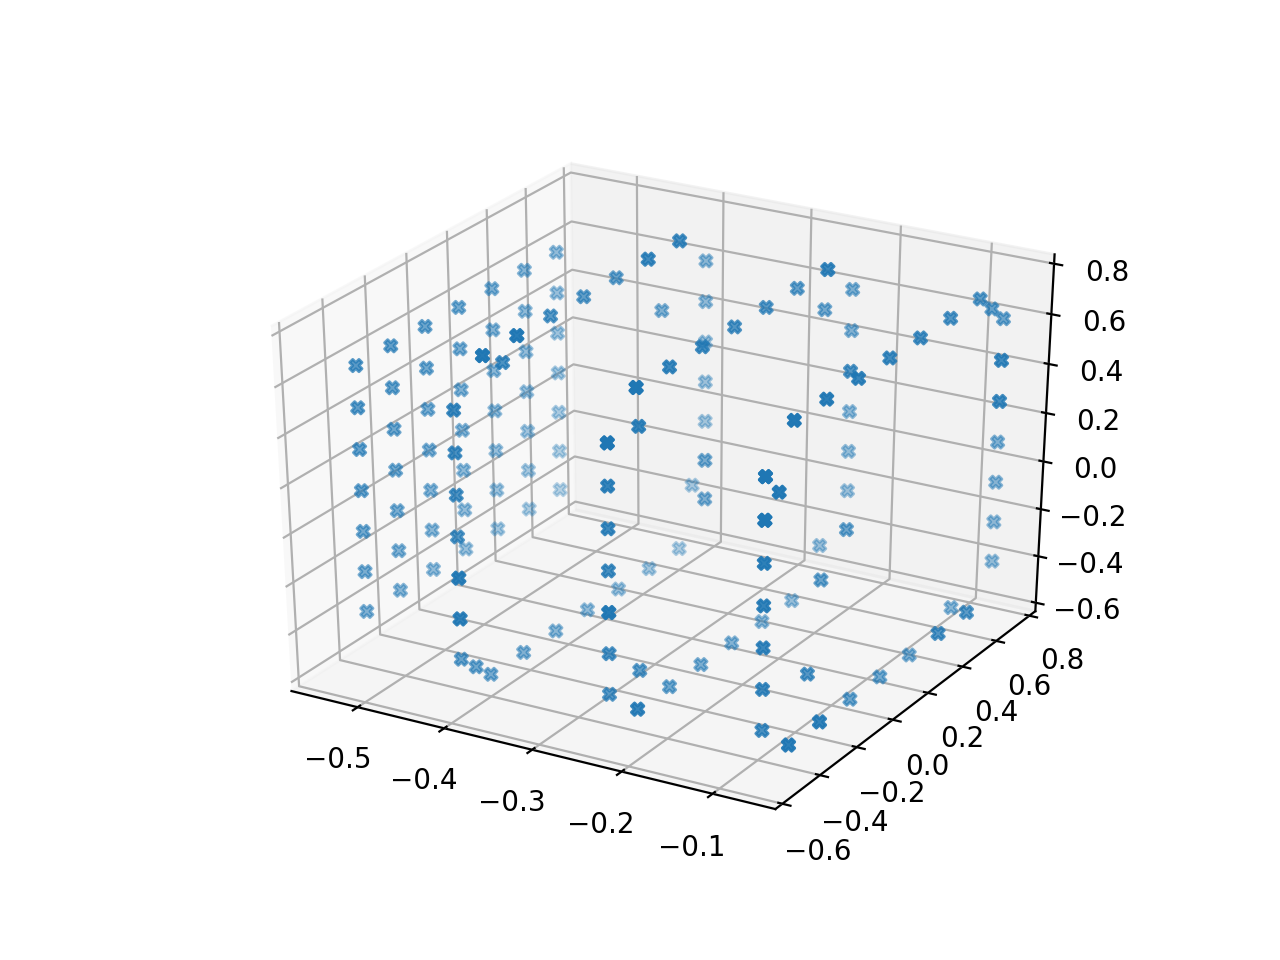

[(169,), (169,), (169,)]


In [14]:
side_name = 'back'
kernel_size = 7

padded = pad_side(sides, side_name, kernel_size)
print(padded.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#plot(ax, o, '8')
plot(ax, padded + 0.1, 'X')

[torch.Size([1, 1, 3]), torch.Size([7, 1, 3]), torch.Size([1, 1, 3])]
[torch.Size([1, 1, 3]), torch.Size([7, 1, 3]), torch.Size([1, 1, 3])]
[torch.Size([7, 1, 3]), torch.Size([7, 7, 3]), torch.Size([7, 1, 3])]
torch.Size([9, 9, 3])


<IPython.core.display.Javascript object>


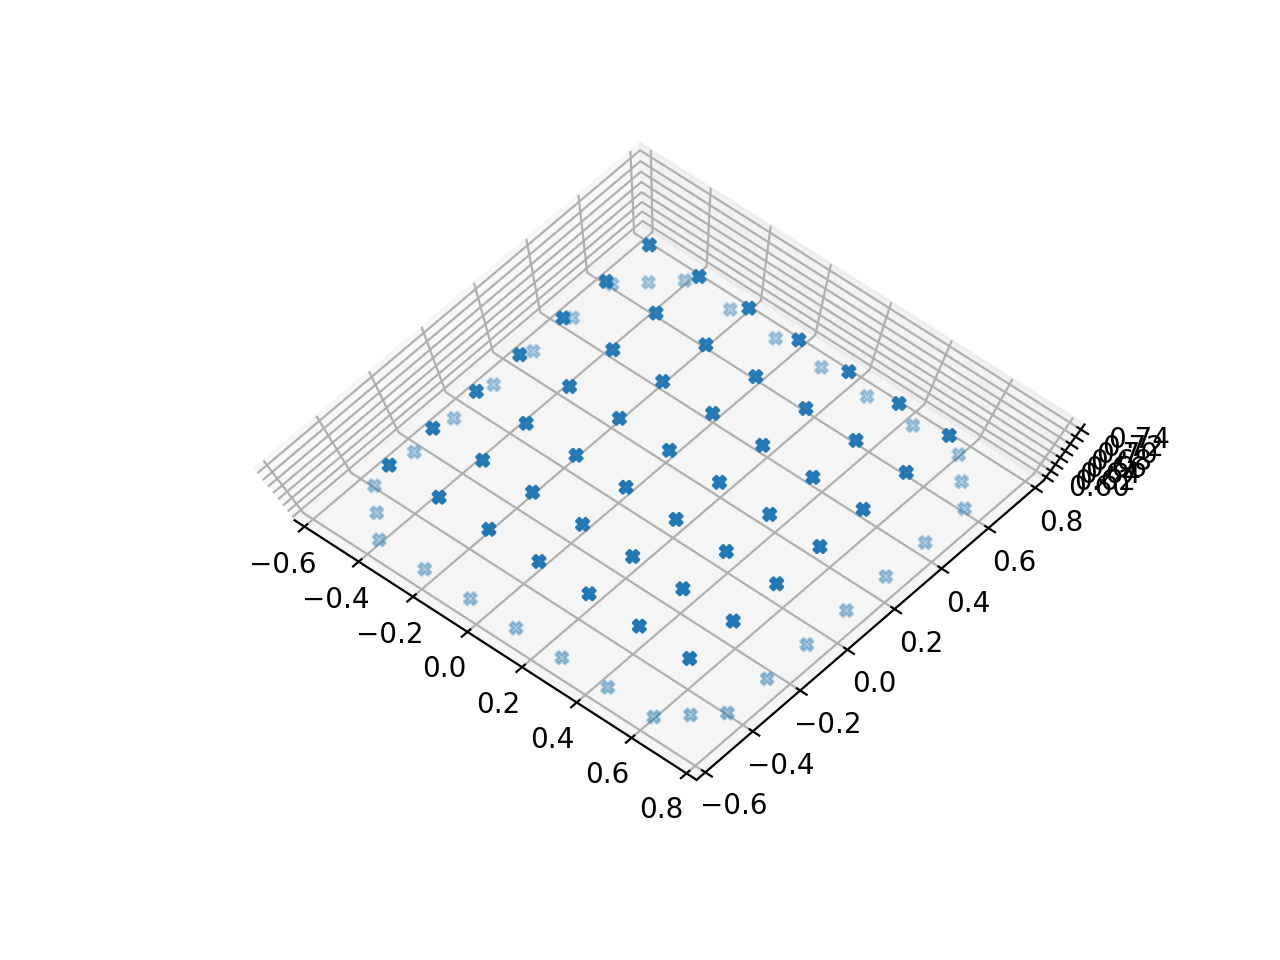

[(81,), (81,), (81,)]


In [20]:
def pad_side(sides, side_name, kernel_size):
    o = sides[side_name]
    size = (kernel_size - 1) // 2
    l, r, t, d = get_neighbors(sides, side_name, size)
    lt, tr, ld, dr = get_corners(size, side_name, l, r, t, d)
    
    shape(lt, t, tr)
    shape(ld, d, dr)
    shape(l, o, r)
    
    top = torch.cat((lt, t, tr), dim=0)
    down = torch.cat((ld, d, dr), dim=0)
    middle = torch.cat((l.permute(1, 0, 2), o, r.permute(1, 0, 2)), dim=0)

    return torch.cat((top, middle, down), dim=1)

side_name = 'top'
kernel_size = 3

padded = pad_side(sides, side_name, kernel_size)
print(padded.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#plot(ax, o, '8')
plot(ax, padded + 0.1, 'X')